In [29]:
from torchmdnet.datasets import MD17

md17_data = MD17('/share/project/sharefs-skfeng/MD17', dataset_arg='aspirin')

In [7]:
from tqdm import tqdm
energy_y_lst = []
for md_ele in tqdm(md17_data):
    energy_y_lst.append(md_ele.y[0][0].item())

100%|██████████| 211762/211762 [00:16<00:00, 13150.19it/s]


Freedman–Diaconis number of bins: 208


(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 2.000e+00, 1.200e+01,
        1.100e+01, 1.700e+01, 2.400e+01, 2.600e+01, 2.700e+01, 3.700e+01,
        4.400e+01, 6.100e+01, 6.600e+01, 8.100e+01, 1.020e+02, 1.580e+02,
        1.300e+02, 2.160e+02, 2.040e+02, 2.580e+02, 2.760e+02, 3.440e+02,
        3.100e+02, 4.170e+02, 4.060e+02, 5.370e+02, 5.000e+02, 7.300e+02,
        6.300e+02, 8.050e+02, 8.470e+02, 1.050e+03, 1.014e+03, 1.280e+03,
        1.199e+03, 1.456e+03, 1.407e+03, 1.638e+03, 1.595e+03, 2.020e+03,
        1.831e+03, 2.220e+03, 2.089e+03, 2.447e+03, 2.297e+03, 2.567e+03,
        2.499e+03, 2.910e+03, 2.664e+03, 3.048e+03, 2.822e+03, 3.307e+03,
        3.071e+03, 3.475e+03, 3.159e+03, 3.705e+03, 3.352e+03, 3.775e+03,
        3.355e+03, 3.820e+03, 3.498e+03, 4.126e+03, 3.663e+03, 4.006e+03,
        3.605e+03, 4.057e+03, 3.436e+03, 4.084e+03, 3.521e+03, 4.008e+03,
        3.554e+03, 3.946e+03, 3.433e+0

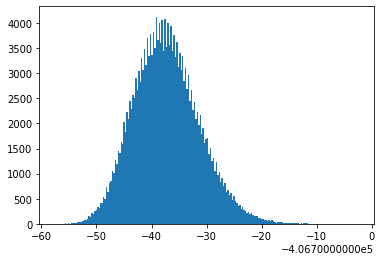

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
energy_y_lst = np.array(energy_y_lst)
q25, q75 = np.percentile(energy_y_lst, [25, 75])
bin_width = 2 * (q75 - q25) * len(energy_y_lst) ** (-1/3)
bins = round((energy_y_lst.max() - energy_y_lst.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(energy_y_lst, bins=bins)

In [8]:
np.argmin(energy_y_lst)
energy_y_lst.min()

-406757.59375

In [7]:
# zero is equibrim state
# coordinate noise
import torch
def transform_noise(data, position_noise_scale):
    noise = torch.randn_like(torch.tensor(data)) * position_noise_scale
    data_noise = data + noise.numpy()
    return data_noise

In [9]:
from sgdml.predict import GDMLPredict
model = np.load('/home/fengshikun/Backup/Denoising/data/md17/aspirin/raw/aspirin-aims.PBE.TS.light.tier.1-train200-sym6.npz')
gdml = GDMLPredict(model)

In [11]:
sample_num = 100
base_pos = md17_data[0].pos
var = 0.04
engery_lst = []
force_lst = []

l_force_lst = []
for i in range(sample_num):
    noise_pos = transform_noise(base_pos, var)
    e, f = gdml.predict(md17_data[1].pos.reshape(1, -1))
    l_force_lst.append(noise_pos / (var**2))
    engery_lst.append(e)
    force_lst.append(f)
    pass


/tmp/ipykernel_2332921/3381657277.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise = torch.randn_like(torch.tensor(data)) * position_noise_scale


In [12]:
l_force_lst[0]

tensor([[ 1427.8524,  -239.8085,   136.1647],
        [  488.4089,  1203.0159,  -269.8469],
        [ 1754.9639,   481.5988,   187.9158],
        [ 1348.8159,  1204.1497,   -21.4439],
        [-2171.8872,   338.8679,   -46.2856],
        [  567.5494,  -284.5828,   -56.9600],
        [   86.2359,   426.8927,  -246.9869],
        [ -616.3341, -1167.3593,  -300.2554],
        [-1048.7764,   572.1810,   861.2278],
        [  543.0536, -1829.7305,   158.2028],
        [  138.0709, -1112.9293,   -90.3443],
        [-1264.5922,   421.8960,   107.1025],
        [ -681.8130,   384.6362,  -469.0994],
        [  254.2209, -2257.9900,   120.4432],
        [ 1728.8496,  -786.9010,   289.3950],
        [  206.4155,  1780.4835,  -417.0917],
        [ 2405.1040,   556.4991,   324.9573],
        [ 1693.9097,  1785.1106,   -58.1593],
        [-2343.2822,  -342.3170,    -9.7402],
        [-2569.2292,   633.8242,   388.8182],
        [-2312.8887,   539.1121,  -684.5096]])

In [13]:
force_lst[0]

array([[ -1.19861306,  -3.22130565,  -1.42358821,  -2.87172542,
        -14.20920556,  -2.4361458 ,  14.73680348,   4.42366951,
          5.02611378,   3.99670651,  -8.17728268,  -0.89062256,
         10.15247004,   9.01324687, -18.47962954,  15.21474101,
        -14.03951319,   5.32275674,  17.22752595,  -0.85613952,
         10.58833901, -18.88415199, -12.19020303,  -2.5136951 ,
          7.15359428,   5.49409836,  29.00075274,  48.58482076,
         -7.80991739,  14.7770454 , -42.53855859,  -5.95728162,
        -10.89149128, -14.65693996,  -0.97592426,  29.58411104,
        -25.00184999,   8.81718753, -43.95797858, -10.65088845,
         18.39611116,  -6.11445589,   3.30130064,  -4.77917443,
          1.71655743, -13.00628296,  16.76872804,  -3.84593786,
          3.1001219 ,  -0.07650858,   0.45423587,   8.42465242,
         18.20584858,   0.63580595,   0.34558019,  -4.0693816 ,
          0.4733881 ,   1.54625809,  -2.82932563,   4.85358224,
         -4.97556468,  -1.9277268 , -11.

In [29]:
sample_num = 100
base_pos = md17_data[0].pos
var = 0.04
engery_lst = []
force_lst = []

l_force_lst = []
for i in range(sample_num):
    noise_pos = transform_noise(base_pos, var)
    e, f = gdml.predict(md17_data[1].pos.reshape(1, -1))
    l_force_lst.append(noise_pos / (var**2))
    engery_lst.append(e)
    force_lst.append(f)
    pass

/tmp/ipykernel_2319327/3381657277.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise = torch.randn_like(torch.tensor(data)) * position_noise_scale


In [1]:
npy_file = '/share/project/sharefs-skfeng/xyz2mol/aspirin.npy'
import numpy as np
asp_mols = np.load(npy_file,allow_pickle=True)

In [6]:
equi_mol = asp_mols[0]
# print(equi_mol.GetConformer().GetPositions())
org_pos = equi_mol.GetConformer().GetPositions()

In [10]:
from torsion_utils import get_torsions, GetDihedral, apply_changes
from rdkit import Chem
no_h_mol = Chem.RemoveHs(equi_mol)
rotable_bonds = get_torsions([no_h_mol])
print(rotable_bonds)

[(0, 5, 10, 7), (1, 6, 12, 11), (6, 12, 11, 4)]


In [11]:
org_angle = []
for rot_bond in rotable_bonds:
    org_angle.append(GetDihedral(equi_mol.GetConformer(), rot_bond))

In [14]:
X_lst = []

sample_num = 10

for i in range(sample_num):
    dihedral_angle_noise_scale = 2
    print(org_angle)
    noise_angle = transform_noise(org_angle, dihedral_angle_noise_scale)
    print(noise_angle)
    new_mol = apply_changes(equi_mol, noise_angle, rotable_bonds)
    new_pos = new_mol.GetConformer().GetPositions()
    delta_pos = new_pos - org_pos
    delta_angle = noise_angle - org_angle
    X=np.linalg.lstsq(delta_angle.reshape(1, -1),delta_pos.reshape(1, -1),  rcond = -1)
    X_lst.append(X[0])

[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-177.94055474  -98.10292896 -173.06372698]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-180.24434984  -92.82364116 -174.01438632]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-178.77668047  -95.40692719 -175.19105723]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-180.79407442  -93.65331068 -174.85803419]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-179.33013958  -91.29980537 -176.28760167]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-178.3195045   -93.38021355 -172.09909674]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-176.67813933  -92.15894266 -174.11888167]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-175.85560692  -95.2037793  -171.38531061]
[-179.96001422864467, -93.06990750870683, -174.79257866084222]
[-181.76584149  -91.59235784 -173.82998183]
[-179.96001422864467, -93.06990750870

In [19]:
(np.abs(X_lst[0] - X_lst[1])).mean()

0.0024250691629728685

In [25]:
(np.abs(X_lst[0])).mean()

0.0018809190435132121

In [28]:
X_lst[0]

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         7.89251714e-04, -9.43033887e-03, -1.54759178e-04,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         6.39939435e-04, -3.11976076e-04, -2.19941350e-03,
         1.18571871e-04, -1.01031412e-02,  8.77848855e-04,
        -7.09517690e-04,  3.45894615e-04,  2.43869529e-03,
        -0.00000000e+00,  1.38404797e-17, -0.00000000e+00,
         2.78329046e-04, -6.53894538e-03,  2.78766408e-04,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -6.78821572e-04,  3.30932988e-04,  2.33289399e-03,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+0

In [221]:
np.dot(delta_angle.reshape(1, -1), X[0])

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00299793,  0.03106409, -0.00493738,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00837038,  0.00404453,  0.03239896,  0.00286983,
        -0.0394458 ,  0.00517062,  0.0092804 , -0.00448422, -0.03592373,
         0.        ,  0.        ,  0.        ,  0.00017128, -0.00538441,
         0.00044723,  0.        ,  0.        ,  0.        ,  0.00887903,
        -0.00429033, -0.03436525,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.02422324,
         0.03480305, -0.03000291,  0.00768164,  0.02582839,  0.00782787,
         0.00525592,  0.05891856,  0.00346892]])

In [30]:
sample_num = 1000
base_pos = md17_data[0].pos
tau = 0.04
engery_lst = []
force_lst = []

l_force_lst = []
for i in tqdm(range(sample_num)):
    # coord noise
    noise_pos = transform_noise(base_pos, tau).numpy()
    e, f = gdml.predict(noise_pos.reshape(1, -1))
    # predict force field
    engery_lst.append(e)
    force_lst.append(f)
    # estimated force field
    l_force_lst.append( (base_pos-noise_pos).numpy() / (tau**2))


from scipy.stats import pearsonr
pear_lst = []
for i in range(sample_num):
    res = pearsonr(l_force_lst[i].flatten(), force_lst[i].flatten())
    pear_lst.append(res[0])
np.mean(pear_lst)

NameError: name 'tqdm' is not defined

Freedman–Diaconis number of bins: 29


(array([  3.,   2.,  14.,  32.,  47.,  82.,  97., 105., 107., 106.,  87.,
         93.,  63.,  41.,  46.,  16.,  24.,  14.,   6.,   5.,   1.,   6.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-406749.84669685, -406746.58612343, -406743.32555001,
        -406740.06497658, -406736.80440316, -406733.54382974,
        -406730.28325632, -406727.0226829 , -406723.76210947,
        -406720.50153605, -406717.24096263, -406713.98038921,
        -406710.71981578, -406707.45924236, -406704.19866894,
        -406700.93809552, -406697.6775221 , -406694.41694867,
        -406691.15637525, -406687.89580183, -406684.63522841,
        -406681.37465498, -406678.11408156, -406674.85350814,
        -406671.59293472, -406668.3323613 , -406665.07178787,
        -406661.81121445, -406658.55064103, -406655.29006761]),
 <BarContainer object of 29 artists>)

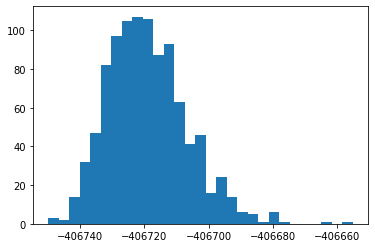

In [225]:
import matplotlib.pyplot as plt 

energy_y_lst = np.array(engery_lst)
q25, q75 = np.percentile(energy_y_lst, [25, 75])
bin_width = 2 * (q75 - q25) * len(energy_y_lst) ** (-1/3)
bins = round((energy_y_lst.max() - energy_y_lst.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(energy_y_lst, bins=bins)

In [226]:
def get_SIGMA(C, sigma, tau, N, m):
    C1 = C[:m, :] # m x m
    C2 = C[m:, :] # (3N - m) x m
    # print(C2.shape)

    SIGMA_lt =  (tau ** 2) * np.identity(m) + (sigma ** 2) * np.dot(C1, C1.T) # left top
    SIGMA_lb = (sigma ** 2) * np.dot(C2, C1.T) # left bottom
    SIGMA_rt = (sigma ** 2) * np.dot(C1, C2.T) # right top
    SIGMA_rb = (tau ** 2) * np.identity(3*N - m) + (sigma ** 2) * np.dot(C2, C2.T) # right bottom

    SIGMA = np.zeros((3*N, 3*N), dtype=np.float32) # 3N x 3N
    SIGMA[:m, :m] = SIGMA_lt # m x m
    SIGMA[m:, :m] = SIGMA_lb # (3N - m) x m
    SIGMA[:m, m:] = SIGMA_rt # m x (3N - m)
    SIGMA[m:, m:] = SIGMA_rb # (3N - m) * (3N -m)

    return SIGMA


In [227]:
no_h_mol = Chem.RemoveHs(equi_mol)
rotable_bonds = get_torsions([no_h_mol])
print(rotable_bonds)

org_angle = []
for rot_bond in rotable_bonds:
    org_angle.append(GetDihedral(equi_mol.GetConformer(), rot_bond))

sample_num = 1000
base_pos = md17_data[0].pos
tau = 0.04
sigma = 2
N = base_pos.shape[0]
m = len(org_angle)
engery_lst = []
force_lst = []
a_force_lst = []
for i in tqdm(range(sample_num)):
    # angle noise
    noise_angle = transform_noise(org_angle, sigma)
    new_mol = apply_changes(equi_mol, noise_angle, rotable_bonds)
    new_pos = new_mol.GetConformer().GetPositions()
    delta_pos = new_pos - org_pos
    delta_angle = noise_angle - org_angle
    
    C=np.linalg.lstsq(delta_angle.reshape(1, -1),delta_pos.reshape(1, -1),  rcond = -1)[0].T
    SIGMA = get_SIGMA(C, sigma, tau, N, m)
    SIGMA_reverse = np.linalg.inv(SIGMA)

    # coord noise
    noise_pos = transform_noise(new_pos, tau)
    e, f = gdml.predict(noise_pos.reshape(1, -1))
    # predict force 
    engery_lst.append(e)
    force_lst.append(f)
    
    # estimate force
    a_force = SIGMA_reverse.dot((base_pos - noise_pos).reshape(-1, 1).numpy()).flatten()
    a_force_lst.append(a_force)
    
    pass

[(0, 5, 10, 7), (1, 6, 12, 11), (6, 12, 11, 4)]


100%|██████████| 1000/1000 [00:14<00:00, 67.38it/s]


In [228]:
from scipy.stats import pearsonr
pear_lst = []
for i in range(sample_num):
    res = pearsonr(a_force_lst[i].flatten(), force_lst[i].flatten())
    pear_lst.append(res[0])
np.mean(pear_lst)

0.5819597216516975

In [217]:
a_force_lst[0]
print(a_force_lst[0],force_lst[0])

[-28.02800634  28.64996236 -11.31603628   9.91106673   1.7473637
   9.75409754  21.78293665  23.68721144  -8.39807694 -27.72242201
 -19.90780615 -56.33997605 -23.13063493 -30.15816834 -30.26542319
  -8.16806657  31.64376491  15.89413974  -9.9000343  -13.55653854
  22.92155168  -5.84946503 -14.33306828 -11.37568193   6.98977942
  -8.48252511 -10.04471802  -2.33009075 -15.56770994  21.54722071
  11.76649032  -3.16692816  -3.1123923  -11.49357649  16.24866179
 -11.65504124 -64.06320825  23.34886113  -7.95939042  19.56103336
  32.19655814 -30.78223633   3.57011332  -3.65452352  36.3685051
 -38.60526072 -40.24677692 -40.13732365 -41.09481442  28.95343383
  15.4339319   28.97644339 -14.81263016 -27.88149261 -21.67871949
  38.94353026  16.43065477 -17.46916186  21.88060303  -2.90744948
 -27.978164   -20.54432732   5.40213816] [[-115.83302381   54.48082423  -43.08087387   81.7914583    50.82601998
    28.05011871  108.65146533   49.98480962   23.15046315  -92.24701396
   -71.96581437  -34.2385

Freedman–Diaconis number of bins: 28


(array([  5.,   4.,  23.,  30.,  60.,  85.,  96., 101., 126.,  97.,  84.,
         77.,  60.,  52.,  34.,  22.,  14.,   9.,   9.,   2.,   4.,   1.,
          0.,   2.,   2.,   0.,   0.,   1.]),
 array([-406749.77425694, -406746.47104386, -406743.16783078,
        -406739.8646177 , -406736.56140462, -406733.25819154,
        -406729.95497846, -406726.65176538, -406723.3485523 ,
        -406720.04533922, -406716.74212614, -406713.43891306,
        -406710.13569998, -406706.8324869 , -406703.52927382,
        -406700.22606074, -406696.92284766, -406693.61963458,
        -406690.3164215 , -406687.01320842, -406683.70999534,
        -406680.40678226, -406677.10356918, -406673.8003561 ,
        -406670.49714302, -406667.19392994, -406663.89071686,
        -406660.58750378, -406657.2842907 ]),
 <BarContainer object of 28 artists>)

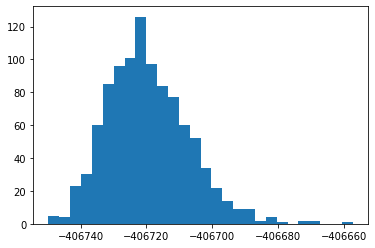

In [184]:
import matplotlib.pyplot as plt 

energy_y_lst = np.array(engery_lst)
q25, q75 = np.percentile(energy_y_lst, [25, 75])
bin_width = 2 * (q75 - q25) * len(energy_y_lst) ** (-1/3)
bins = round((energy_y_lst.max() - energy_y_lst.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(energy_y_lst, bins=bins)